In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
import numpy as np
import os

In [2]:
!pip install tensorflow

from goggle.colab import files
uploaded = files.upload()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving story.txt to story.txt


open a file and store it into list,convert list to string.
Replace unnecessary symbols with spaces.
To remove unnecessary spaces in my data for this split text and store in list.
Convert list to string.

In [4]:
file = open("story.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Women in Love, by D. H. Lawrence This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this '

In [5]:
len(data)

427915

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:20]

[1,
 1566,
 1567,
 1171,
 4,
 234,
 9,
 102,
 65,
 1568,
 1172,
 1932,
 44,
 1171,
 18,
 25,
 1,
 447,
 4,
 2546]

In [7]:
len(sequence_data)

76923

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7659


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  76920


array([[   1, 1566, 1567, 1171],
       [1566, 1567, 1171,    4],
       [1567, 1171,    4,  234],
       [1171,    4,  234,    9],
       [   4,  234,    9,  102],
       [ 234,    9,  102,   65],
       [   9,  102,   65, 1568],
       [ 102,   65, 1568, 1172],
       [  65, 1568, 1172, 1932],
       [1568, 1172, 1932,   44]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [11]:
print("Data: ", X[:10])
print("Response: ", y[:10])


Data:  [[   1 1566 1567]
 [1566 1567 1171]
 [1567 1171    4]
 [1171    4  234]
 [   4  234    9]
 [ 234    9  102]
 [   9  102   65]
 [ 102   65 1568]
 [  65 1568 1172]
 [1568 1172 1932]]
Response:  [1171    4  234    9  102   65 1568 1172 1932   44]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             76590     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7659)              7666659   
                                                                 
Total params: 20,792,249
Trainable params: 20,792,249
Non-trainable params: 0
_________________________________________________________________


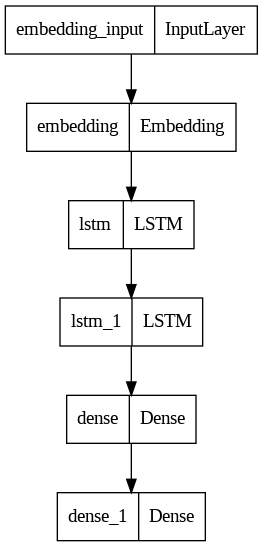

In [15]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])


Epoch 1/70
1202/1202 [==============================] - ETA: 0s - loss: 6.5877
Epoch 1: loss improved from inf to 6.58766, saving model to next_words.h5
1202/1202 [==============================] - 35s 21ms/step - loss: 6.5877
Epoch 2/70
1201/1202 [============================>.] - ETA: 0s - loss: 6.0465
Epoch 2: loss improved from 6.58766 to 6.04618, saving model to next_words.h5
1202/1202 [==============================] - 18s 15ms/step - loss: 6.0462
Epoch 3/70
1200/1202 [============================>.] - ETA: 0s - loss: 5.6989
Epoch 3: loss improved from 6.04618 to 5.69925, saving model to next_words.h5
1202/1202 [==============================] - 19s 16ms/step - loss: 5.6993
Epoch 4/70
1201/1202 [============================>.] - ETA: 0s - loss: 5.4203
Epoch 4: loss improved from 5.69925 to 5.42023, saving model to next_words.h5
1202/1202 [==============================] - 18s 15ms/step - loss: 5.4202
Epoch 5/70
1201/1202 [============================>.] - ETA: 0s - loss: 5.1754
E

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue


Enter your line: ironically, “it
['ironically,', '“it']
Error occurred:  in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
   